# 08-Analyse de la distribution des mesures Humidité, pression

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../data/raw/weatherAUS.csv', index_col = 'Date')
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## Humidity9am

In [42]:
h9 = df['Humidity9am'].copy()
h9.dropna(inplace = True)
h9.info()

<class 'pandas.core.series.Series'>
Index: 142806 entries, 2008-12-01 to 2017-06-25
Series name: Humidity9am
Non-Null Count   Dtype  
--------------   -----  
142806 non-null  float64
dtypes: float64(1)
memory usage: 2.2+ MB


Il y a  1425 valeurs extrèmes inférieures pour la mesure Humidity9am sur 142806 valeurs mesurées.
Cela correspond à 1.0 % des valeurs de cette colonne.


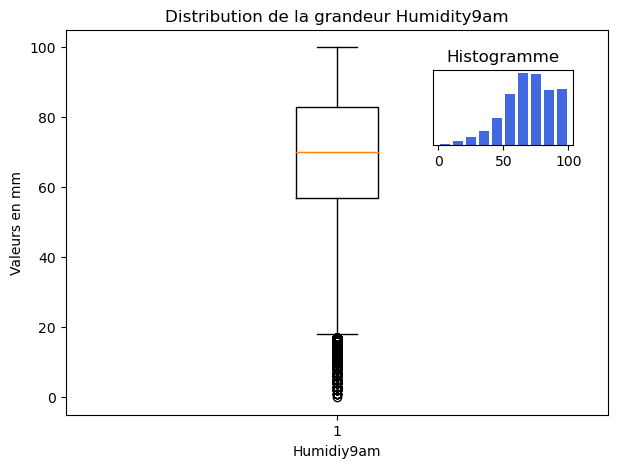

In [93]:
ext_min = h9.quantile(q = 0.25)-1.5*(h9.quantile(q = 0.75)-h9.quantile(q = 0.25))
# ext_min est la frontière pour les valeurs extrèmes minimales, cad < Q1 -1.5*IQR

h9_min = h9.loc[h9 < ext_min]
print("Il y a ", h9_min.shape[0], "valeurs extrèmes inférieures pour la mesure Humidity9am sur", h9.shape[0], "valeurs mesurées.")
p = round(h9_min.shape[0]/h9.shape[0]*100, 2)
print("Cela correspond à",p , "% des valeurs de cette colonne.")

import statsmodels.api as sm
plt.figure(figsize=(7,5))

plt.boxplot(h9)
plt.xlabel('Humidiy9am')
plt.ylabel('Valeurs en mm')
plt.title('Distribution de la grandeur Humidity9am')
plt.axes([0.65, 0.65, 0.2, 0.15])
plt.hist(h9, rwidth = 0.8, color = 'royalblue')
plt.title('Histogramme')
#plt.xticks([])
plt.yticks([])

#sm.qqplot(h9, fit = True, line = '45')
plt.show()

In [ ]:
# Rien d'anormal ici.

## Humidity3pm

Il y a  0 valeurs extrèmes inférieures pour la mesure Humidity9am sur 140953 valeurs mesurées.
Cela correspond à 0.0 % des valeurs de cette colonne.
-------------------------------------------
Il y a  0 valeurs extrèmes inférieures pour la mesure Humidity9am sur 140953 valeurs mesurées.
Cela correspond à 0.0 % des valeurs de cette colonne.


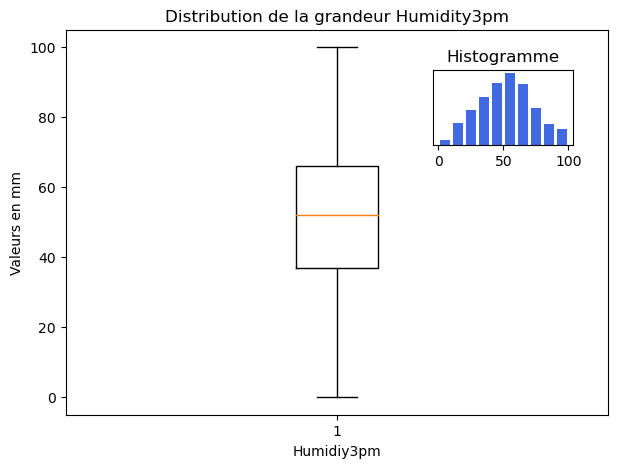

In [92]:
h3 = df['Humidity3pm'].copy()
h3.dropna(inplace = True)

ext_min = h3.quantile(q = 0.25)-1.5*(h3.quantile(q = 0.75)-h3.quantile(q = 0.25))
# ext_min est la frontière pour les valeurs extrèmes minimales, cad < Q1 -1.5*IQR
ext_max = h3.quantile(q = 0.75)+1.5*(h3.quantile(q = 0.75)-h3.quantile(q = 0.25))
# ext_max est la frontière pour les valeurs extrèmes maximales, cad > Q + 1.5*IQR

h3_min = h3.loc[h3 < ext_min]
print("Il y a ", h3_min.shape[0], "valeurs extrèmes inférieures pour la mesure Humidity9am sur", h3.shape[0], "valeurs mesurées.")
p_min = round(h3_min.shape[0]/h3.shape[0]*100, 2)
print("Cela correspond à",p_min , "% des valeurs de cette colonne.")
print("-------------------------------------------")

h3_max = h3.loc[h3 > ext_max]
print("Il y a ", h3_max.shape[0], "valeurs extrèmes inférieures pour la mesure Humidity9am sur", h3.shape[0], "valeurs mesurées.")
p_max = round(h3_max.shape[0]/h3.shape[0]*100, 2)
print("Cela correspond à",p_max , "% des valeurs de cette colonne.")
import statsmodels.api as sm
plt.figure(figsize=(7,5))

plt.boxplot(h3)
plt.xlabel('Humidiy3pm')
plt.ylabel('Valeurs en mm')
plt.title('Distribution de la grandeur Humidity3pm')
plt.axes([0.65, 0.65, 0.2, 0.15])
plt.hist(h3, rwidth = 0.8, color = 'royalblue')
plt.title('Histogramme')
#plt.xticks([])
plt.yticks([])

#sm.qqplot(h9, fit = True, line = '45')
plt.show()

In [ ]:
# Rien d'anormal ici.

# Fonction rapport_stat:

In [94]:
def rapport_stat(mesure):
    df_mes = df[mesure].copy()
    df_mes.dropna(inplace = True)

    ext_min = df_mes.quantile(q = 0.25)-1.5*(df_mes.quantile(q = 0.75)-df_mes.quantile(q = 0.25))
    # ext_min est la frontière pour les valeurs extrèmes minimales, cad < Q1 -1.5*IQR
    ext_max = df_mes.quantile(q = 0.75)+1.5*(df_mes.quantile(q = 0.75)-df_mes.quantile(q = 0.25))
    # ext_max est la frontière pour les valeurs extrèmes maximales, cad > Q + 1.5*IQR

    df_mes_min = df_mes.loc[df_mes < ext_min]
    print("Il y a ", df_mes_min.shape[0], "valeurs extrèmes inférieures pour la mesure", str(mesure),  "sur", df_mes.shape[0], "valeurs mesurées.")
    p_min = round(df_mes_min.shape[0]/df_mes.shape[0]*100, 2)
    print("Cela correspond à",p_min , "% des valeurs de cette colonne.")
    print("-------------------------------------------")

    df_mes_max = df_mes.loc[df_mes > ext_max]
    print("Il y a ", df_mes_max.shape[0], "valeurs extrèmes inférieures pour la mesure" , str(mesure),  "sur", df_mes.shape[0], "valeurs mesurées.")
    p_max = round(df_mes_max.shape[0]/h3.shape[0]*100, 2)
    print("Cela correspond à",p_max , "% des valeurs de cette colonne.")
    
    import statsmodels.api as sm
    plt.figure(figsize=(7,5))

    plt.boxplot(df_mes)
    plt.xlabel(str(mesure))
    plt.ylabel('Valeurs en mm')
    plt.title('Distribution de la grandeur '+ mesure)
    plt.axes([0.65, 0.65, 0.2, 0.15])
    plt.hist(df_mes, rwidth = 0.8, color = 'royalblue')
    plt.title('Histogramme')
    #plt.xticks([])
    plt.yticks([])

    #sm.qqplot(df_mes, fit = True, line = '45')
    plt.show()

# Pression à 9h

Il y a  878 valeurs extrèmes inférieures pour la mesure Pressure9am sur 130395 valeurs mesurées.
Cela correspond à 0.67 % des valeurs de cette colonne.
-------------------------------------------
Il y a  313 valeurs extrèmes inférieures pour la mesure Pressure9am sur 130395 valeurs mesurées.
Cela correspond à 0.22 % des valeurs de cette colonne.


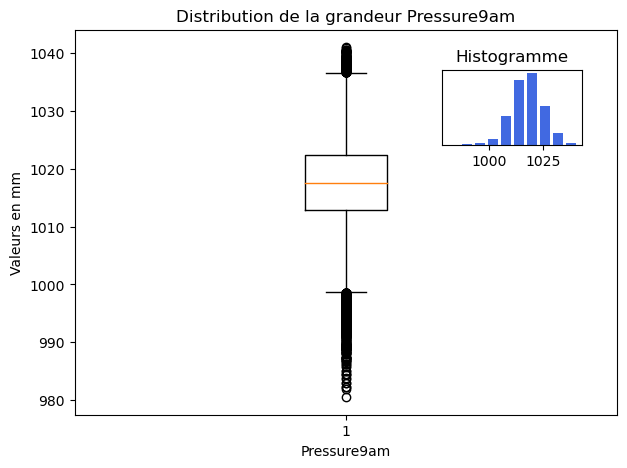

In [95]:
rapport_stat('Pressure9am')

In [ ]:
# Rien d'anormal ici.

# Pression à 15h

Il y a  631 valeurs extrèmes inférieures pour la mesure Pressure3pm sur 130432 valeurs mesurées.
Cela correspond à 0.48 % des valeurs de cette colonne.
-------------------------------------------
Il y a  288 valeurs extrèmes inférieures pour la mesure Pressure3pm sur 130432 valeurs mesurées.
Cela correspond à 0.2 % des valeurs de cette colonne.


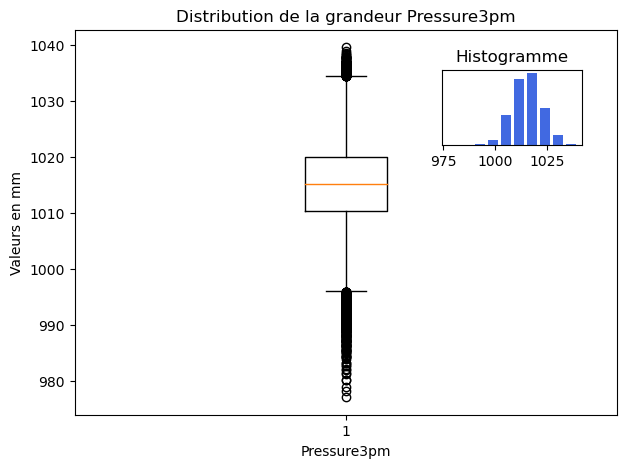

In [96]:
rapport_stat('Pressure3pm')

In [ ]:
# Rien d'anormal ici.

# Précipitations

Il y a  0 valeurs extrèmes inférieures pour la mesure Rainfall sur 142199 valeurs mesurées.
Cela correspond à 0.0 % des valeurs de cette colonne.
-------------------------------------------
Il y a  25578 valeurs extrèmes inférieures pour la mesure Rainfall sur 142199 valeurs mesurées.
Cela correspond à 18.15 % des valeurs de cette colonne.


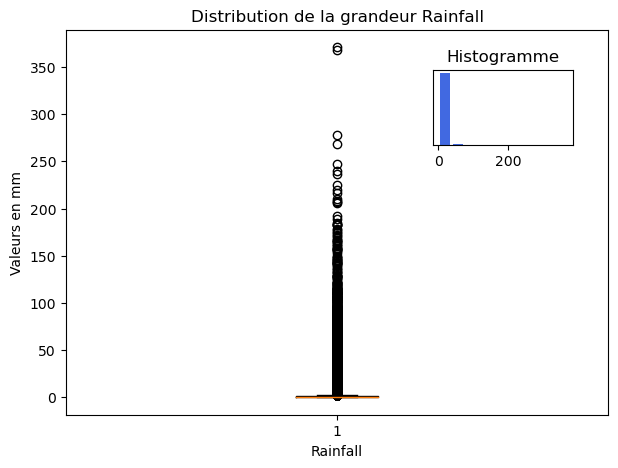

In [103]:
rapport_stat('Rainfall')

In [106]:
# 18% de valeurs extrèmes maximales, ça fait beaucoup. Mais Rainfall contient beaucoup de valeurs nulles, quand il ne pleut pas. 
# Enlevons-les et voyons ce que ça donne.

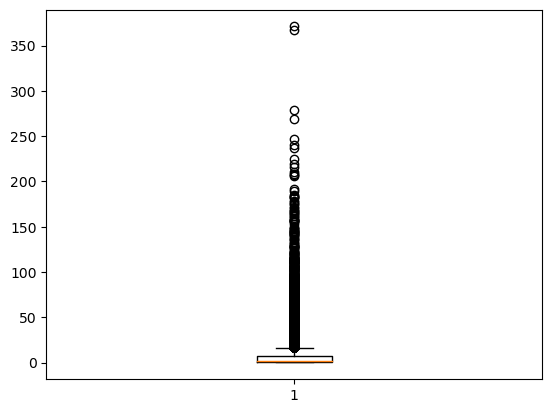

In [107]:
rf = df['Rainfall'].loc[df['Rainfall'] > 0].copy() # on ne garde que les valeurs non-nulles.
rf.dropna(inplace = True)
plt.boxplot(rf);

Il y a  0 valeurs extrèmes inférieures pour la mesure Rainfall sur 51119 valeurs mesurées.
Cela correspond à 0.0 % des valeurs de cette colonne.
-------------------------------------------
Il y a  5220 valeurs extrèmes inférieures pour la mesure Rainfall sur 51119 valeurs mesurées.
Cela correspond à 10.21 % des valeurs de cette colonne.


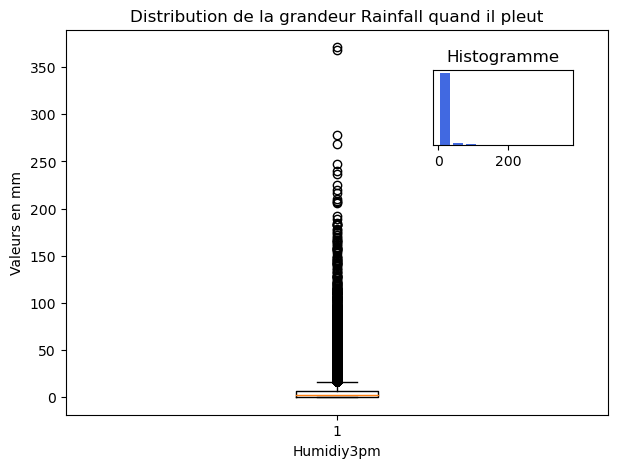

In [108]:
ext_min = rf.quantile(q = 0.25)-1.5*(rf.quantile(q = 0.75)-rf.quantile(q = 0.25))
# ext_min est la frontière pour les valeurs extrèmes minimales, cad < Q1 -1.5*IQR
ext_max = rf.quantile(q = 0.75)+1.5*(rf.quantile(q = 0.75)-rf.quantile(q = 0.25))
# ext_max est la frontière pour les valeurs extrèmes maximales, cad > Q + 1.5*IQR

rf_min = rf.loc[rf < ext_min]
print("Il y a ", rf_min.shape[0], "valeurs extrèmes inférieures pour la mesure Rainfall sur", rf.shape[0], "valeurs mesurées.")
p_min = round(rf_min.shape[0]/rf.shape[0]*100, 2)
print("Cela correspond à",p_min , "% des valeurs de cette colonne.")
print("-------------------------------------------")

rf_max = rf.loc[rf > ext_max]
print("Il y a ", rf_max.shape[0], "valeurs extrèmes inférieures pour la mesure Rainfall sur", rf.shape[0], "valeurs mesurées.")
p_max = round(rf_max.shape[0]/rf.shape[0]*100, 2)
print("Cela correspond à",p_max , "% des valeurs de cette colonne.")
import statsmodels.api as sm
plt.figure(figsize=(7,5))

plt.boxplot(rf)
plt.xlabel('Humidiy3pm')
plt.ylabel('Valeurs en mm')
plt.title('Distribution de la grandeur Rainfall quand il pleut')
plt.axes([0.65, 0.65, 0.2, 0.15])
plt.hist(rf, rwidth = 0.8, color = 'royalblue')
plt.title('Histogramme')
#plt.xticks([])
plt.yticks([])

#sm.qqplot(h9, fit = True, line = '45')
plt.show()

In [112]:
# On tombe à 10% de valeurs extrèmes maximales, ce qui est encore beaucoup. Mais après tout, c'est peut-être que quand il pleut, il pleut pas beaucoup.
# Et que quelques fois, quand il pleut, il pleut très fort.

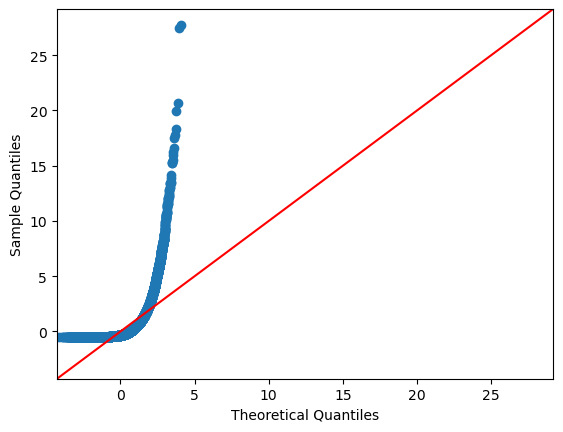

In [111]:
sm.qqplot(rf, fit = True, line = '45');

In [ ]:
# La distribution des précipitations n'est pas du tout normale.
# Idée: il faudrait séparer rf en deux classes: 
# faibles précipitations
# fortes précipitations
# et regarder.

# Ensoleillement